In [1172]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *


In [1173]:
# prices_sol = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/SOLUSDT_2025_1m.csv')
# prices_bnsol = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/BNSOLUSDT_2025_1m.csv')



In [1174]:
# merge_ohlc_closing_prices('binance_data/ETH_and_WBETH/2024/1m')

# Get Data 
---

 * ## Closing price data


In [1175]:

#prices = pd.read_csv("binance_data/Staked_ETH_Bybit/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/From_Paper/2023/1m/merged_From_Paper_closing_prices_OCT_NOV.csv", index_col=0, parse_dates=True)

#BTC and WBTC
#-------------------------------------------
#prices = pd.read_csv("binance_data/Wrapped BTC/2024/30m/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/Wrapped BTC/2024/1m/merged_closing_prices.csv", index_col=0, parse_dates=True)


#SOL and BNSOL
#-------------------------------------------
#prices = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#ETH and WBTC
#-------------------------------------------
#prices = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#Top 100
#-------------------------------------------
prices = pd.read_csv('binance_data/top_100_tickers/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

In [1176]:
prices = prices[['XRP/USDT_2024_1m', 'ADA/USDT_2024_1m']]

#prices = prices[['DOT/USDT_2024_1m', 'XTZ/USDT_2024_1m']]

#BCH/USDT_2024_1m & DOGE/USDT_2024_1m
#-------------------------------------------
#prices = prices[['BCH/USDT_2024_1m', 'DOGE/USDT_2024_1m']]

#GALA/USDT_2024_1m & GRT/USDT_2024_1m,0.0056584346126191745,-4.071777010162084
#-------------------------------------------
#prices = prices[['GALA/USDT_2024_1m', 'GRT/USDT_2024_1m']]

In [1177]:
prices

,XRP/USDT_2024_1m,ADA/USDT_2024_1m
timestamp,,
2024-01-01 00:00:00,0.6155,0.5940
2024-01-01 00:01:00,0.6159,0.5947
2024-01-01 00:02:00,0.6163,0.5948
2024-01-01 00:03:00,0.6165,0.5960
2024-01-01 00:04:00,0.6168,0.5971
...,...,...
2024-06-30 23:55:00,0.4763,0.3926
2024-06-30 23:56:00,0.4762,0.3924
2024-06-30 23:57:00,0.4763,0.3924


In [1178]:
# count_unchanged_rows = (prices.diff().eq(0).all(axis=1)).sum()
# print("Number of fully unchanged rows:", count_unchanged_rows)

In [1179]:
# prices = prices[prices.diff().ne(0).all(axis=1)]

In [1180]:
# count_unchanged_rows = (prices.diff().eq(0).all(axis=1)).sum()
# print("Number of fully unchanged rows:", count_unchanged_rows)

 * ## Order book data


In [1181]:
# #BTC and WBTC
# #-------------------------------------------
#prices = pd.read_csv('order_book_data/merged_data/1min/btc_wbtc_combined_1m.csv', index_col=0, parse_dates=True)

#ETH and WBETH
#prices = pd.read_csv('order_book_data/merged_data/1min/eth_wbeth_combined_1m.csv', index_col=0, parse_dates=True)


In [1182]:
# Only show mid prices
#prices = prices[['btc_mid_price', 'wbtc_mid_price']]

#prices = prices[['eth_mid_price','wbeth_mid_price']]

In [1183]:
# #Fliter prices to end in May
# prices = prices.loc['2024-01-01':'2024-05-31']

In [1184]:
# prices_ETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/ETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_WBETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/WBETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)   
# prices_WBTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/WBTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_BTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/BTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)

In [1185]:
#get prices for dates greater than or equal to 2024-01-01 16:30:00	

#prices = prices.loc[prices.index >= "2024-01-01 16:30:00"]

# Trading simulation
---

* ## In-Sample Testing

In [1186]:
# #XVS/USDT_2024_30m & QI/USDT_2024_30m


# crypto_1 = prices.columns[0]
# crypto_2 = prices.columns[1]

# cointegrated_pairs = [(crypto_1,
#   crypto_2,
#   0.731393,
#   0.8501886494196308,
#   0.22)]

In [1187]:
#Params:
window_size = 1440
entry_threshold= 3 #3 was prev
exit_threshold= 0
stop_loss_threshold = 100

In [1188]:
prices.columns

Index(['XRP/USDT_2024_1m', 'ADA/USDT_2024_1m'], dtype='object')

## For Closing Price Data 
---

In [1189]:
sym1, sym2 = prices.columns
print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")
S1 = prices[sym1]
S2 = prices[sym2]

# Compute the spread series and beta_series 
spread_series, beta_series, alpha_series = compute_spread_series(S1, S2, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

#                                   FOR CLOSING PRICE DATA
#------------------------------------------------------------------------------------------
# Generate trading signals (positions) based on the spread's z-score
positions, trade_entries, trade_exits = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)



Testing strategy on pair: XRP/USDT_2024_1m and ADA/USDT_2024_1m ...
Total trades closed: 151 (Wins=151, Losses=0)
Win rate: 1.00


## For Order Book Data 
---

In [1190]:
prices.columns

Index(['XRP/USDT_2024_1m', 'ADA/USDT_2024_1m'], dtype='object')

In [1191]:
# sym1, S1_ask_price, S1_bid_price,S1_ask_amount,S1_bid_amount,sym2,S2_ask_price, S2_bid_price,S2_ask_amount,S2_bid_amount  = prices.columns
# print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")

# #Gather relevant columns from order book data
# #-------------------------------------------
# S1_mid_price = prices[sym1]
# S2_mid_price = prices[sym2]
# #-------------------------------------------
# S1_ask_price = prices[S1_ask_price]
# S1_ask_amount = prices[S1_ask_amount]
# S1_bid_price = prices[S1_bid_price]
# S1_bid_amount = prices[S1_bid_amount]
# #-------------------------------------------
# S2_ask_price = prices[S2_ask_price]
# S2_ask_amount = prices[S2_ask_amount]
# S2_bid_price = prices[S2_bid_price]
# S2_bid_amount = prices[S2_bid_amount]
# #-------------------------------------------

# # Compute the spread series and beta_series 
# spread_series, beta_series, alpha_series = compute_spread_series(S1_mid_price, S2_mid_price, window_size)
# #print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# # Compute rolling z-score using the provided helper function.
# zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

# #                                   FOR CLOSING PRICE DATA
# #------------------------------------------------------------------------------------------
# # Generate trading signals (positions) based on the spread's z-score
# #positions, trade_entries, trade_exits = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)

# #                                   FOR ORDER BOOK DATA
# #------------------------------------------------------------------------------------------
# positions, trade_entries, trade_exits = backtest_pair_rolling_order_book(spread_series,
#                                                                          S1_mid_price,
#                                                                          S2_mid_price,
#                                                                          S1_ask_price,
#                                                                          S1_ask_amount,
#                                                                          S1_bid_price,
#                                                                          S1_bid_amount,
#                                                                          S2_ask_price,
#                                                                          S2_ask_amount,
#                                                                          S2_bid_price,
#                                                                          S2_bid_amount,
#                                                                          zscore_series, 
#                                                                          entry_threshold, 
#                                                                          exit_threshold, 
#                                                                          stop_loss_threshold)



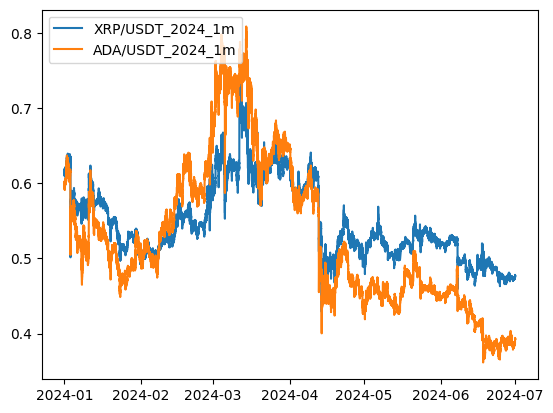

In [1192]:
#Plot the closing prices of the merged data using different y axis

crypto_1 = prices.columns[0]
crypto_2 = prices.columns[1]

plt.plot(prices[crypto_1], label=crypto_1)
plt.plot(prices[crypto_2], label=crypto_2)
plt.legend(loc='upper left')
plt.show()






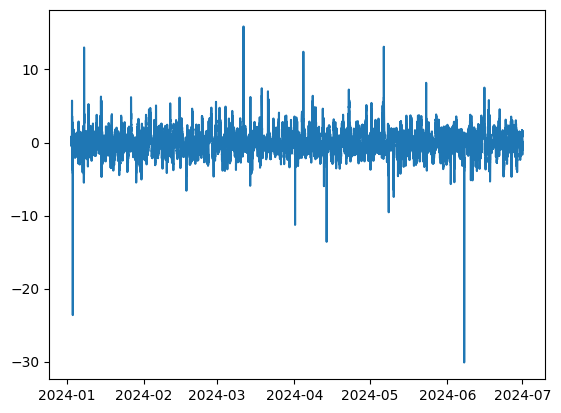

In [1193]:
plt.plot(zscore_series)

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        4.00000e+00, 3.00000e+00, 1.00000e+01, 1.10000e+01, 2.70000e+01,
        7.50000e+01, 3.05000e+02, 3.92400e+03, 4.97420e+04, 1.22939e+05,
        7.03590e+04, 1.03420e+04, 1.12300e+03, 2.16000e+02, 6.40000e+01,
        1.70000e+01, 1.10000e+01, 9.00000e+00, 8.00000e+00, 4.00000e+00]),
 array([-30.12047066, -28.58685763, -27.0532446 , -25.51963156,
        -23.98601853, -22.4524055 , -20.91879247, -19.38517943,
        -17.8515664 , -16.31795337, -14.78434034, -13.2507273 ,
        -11.71711427, -10.18350124,  -8.6498882 ,  -7.11627517,
         -5.58266214,  -4.04904911,  -2.51543607,  -0.98182304,
          0.55178999,   2.08540302,   3.61901606,   5.15262909,
          6.68624212,   8.21985515,   9.75346819,  11.28708122,
         12.82069425,  14.35430728,  15.88792032]),
 <BarContainer object of 30 artists>)

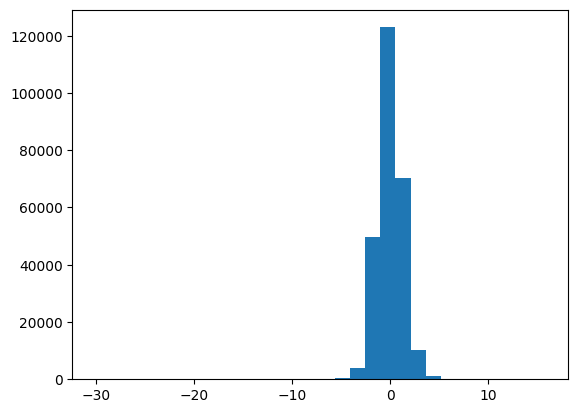

In [1194]:
plt.hist(zscore_series, bins=30)

In [1195]:
# #Compute normalised difference between the two prices
# normalised_abs_diff = np.abs((S1 - S2) / (S1 + S2))

# #Compute the average normalised difference
# np.mean(normalised_abs_diff)

In [1196]:
# #SETH and ETH Distance: 0.0003968226419110906

# s_eth_distance = 0.0003968226419110906
# w_bitcoin_distance = 0.0006442955592394416

# percentage = s_eth_distance/w_bitcoin_distance * 100
# percentage


In [1197]:
# sym1

In [1198]:
# price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
# price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

# len(price_changes_S2_non_zero)

In [1199]:
initial_capital = 10_000.0
#tx_cost= 0.00031 #0.031% transaction cost
tx_cost= 0.00025 #0.025% transaction cost #Binance level 5 Maker Cost

trade_profits, cumulative_profit_series, entry_times, exit_times = simulate_strategy_trade_pnl(trade_entries, trade_exits, initial_capital, beta_series, tx_cost)

Total trades: 151
Number of profitable trades (proft > 0): 102
Number of non-profitable trades (proft < 0): 49
Total return €: -83.23
Total return %: -0.83%
Long spread losses: 23, Short spread losses: 26
Number of Dual-leg profitable trades: 34
Dual leg trade profit rate: 22.52%


In [1200]:
exit_times

[Timestamp('2024-01-03 11:07:00'),
 Timestamp('2024-01-03 13:48:00'),
 Timestamp('2024-01-06 12:21:00'),
 Timestamp('2024-01-07 12:41:00'),
 Timestamp('2024-01-08 00:21:00'),
 Timestamp('2024-01-08 02:52:00'),
 Timestamp('2024-01-09 16:31:00'),
 Timestamp('2024-01-09 23:34:00'),
 Timestamp('2024-01-13 10:05:00'),
 Timestamp('2024-01-14 11:45:00'),
 Timestamp('2024-01-14 19:31:00'),
 Timestamp('2024-01-14 22:31:00'),
 Timestamp('2024-01-15 00:35:00'),
 Timestamp('2024-01-18 19:46:00'),
 Timestamp('2024-01-19 06:37:00'),
 Timestamp('2024-01-19 20:57:00'),
 Timestamp('2024-01-20 05:22:00'),
 Timestamp('2024-01-22 16:55:00'),
 Timestamp('2024-01-23 01:20:00'),
 Timestamp('2024-01-25 16:43:00'),
 Timestamp('2024-01-27 00:45:00'),
 Timestamp('2024-01-29 03:31:00'),
 Timestamp('2024-01-29 18:30:00'),
 Timestamp('2024-01-30 10:56:00'),
 Timestamp('2024-01-30 23:38:00'),
 Timestamp('2024-02-01 21:07:00'),
 Timestamp('2024-02-03 09:03:00'),
 Timestamp('2024-02-03 21:01:00'),
 Timestamp('2024-02-

In [1201]:
cumulative_profit_series[-11]

/var/folders/v0/xxx_2wqx4qsc_858pvgmg3_m0000gp/T/ipykernel_82153/3123887299.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_profit_series[-11]


np.float64(742.6044918208781)

In [1202]:
exit_times[0]

Timestamp('2024-01-03 11:07:00')

In [1203]:
oak = []

print(sum(oak))

0


In [1204]:
#Most profitable trade

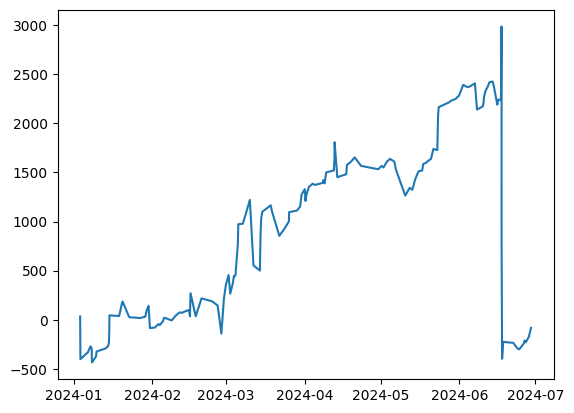

In [1205]:
plt.plot(cumulative_profit_series)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         1.,  2.,  2.,  2.,  1.,  4.,  0.,  4.,  8., 20., 25., 33., 17.,
        12.,  4.,  4.,  1.,  2.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.24404591e+03, -2.21411152e+03, -2.18417713e+03, -2.15424274e+03,
        -2.12430835e+03, -2.09437395e+03, -2.06443956e+03, -2.03450517e+03,
        -2.00457078e+03, -1.97463639e+03, -1.94470200e+03, -1.91476760e+03,
        -1.88483321e+03, -1.85489882e+03, -1.82496443e+03, -1.79503004e+03,
        -1.76509565e+03, -1.73516126e+03, -1.70522686e+03, -1.67529247e+03,
        -1.64535808e+03, -1.61542369e+03, -1.58548930e

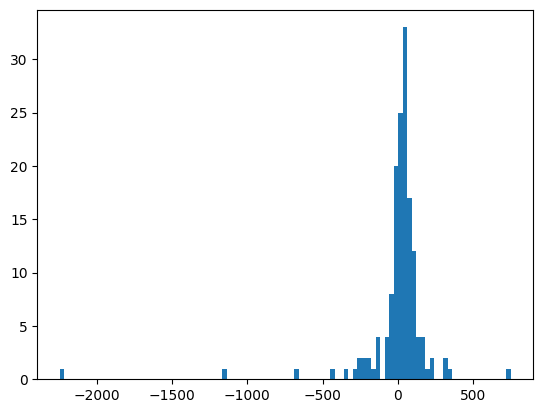

In [1206]:
plt.hist(trade_profits, bins=100)

In [1207]:
#Filter for negative values

trade_profits_neg = [x for x in trade_profits if x < 0]
print(f"Average trade loss:  € {np.mean(trade_profits_neg)}")

trade_profits_pos = [x for x in trade_profits if x > 0]
print(f"Average trade win:  € {np.mean(trade_profits_pos)}")

print("Number of negative profits(profits that were less than the transaction cost): ", len(trade_profits_neg))
print("Number of positive profits (profits that were greater than the transaction cost): ", len(trade_profits_pos))



Average trade loss:  € -163.2386518824902
Average trade win:  € 77.60254313493252
Number of negative profits(profits that were less than the transaction cost):  49
Number of positive profits (profits that were greater than the transaction cost):  102


In [1208]:
#Get index of greatest loss
max_loss_index = trade_profits.index(min(trade_profits))
max_loss_index

140

In [1209]:
trade_entries[max_loss_index]

{'time': Timestamp('2024-06-17 16:19:00'),
 'S1': np.float64(0.4993),
 'S2': np.float64(0.3911),
 'z': np.float64(-3.9483399319075043),
 'position': 1}

In [1210]:
trade_exits[max_loss_index]

{'time': Timestamp('2024-06-17 16:32:00'),
 'S1': np.float64(0.5052),
 'S2': np.float64(0.4021),
 'z': np.float64(0.02127954590548811),
 'exit_type': 'win'}

In [1211]:
# #Calculate returns based on the trade profits
# trade_profits = np.array(trade_profits)
# returns = trade_profits/initial_capital * 100

# #Plot the returns
# plt.hist(returns, bins=50, edgecolor='black')
# plt.xlabel('Returns (%)')   
# plt.ylabel('Frequency')
# plt.title(f'Returns Distribution for Pair {sym1} and {sym2}') 

In [1212]:
# #Calculate percentage price changes for each asset
# price_changes_S1 = np.array(price_changes_S1)

In [1213]:
# #Obtain non-zero price changes
# price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
# price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

# #Convert price changes to percentage
# price_changes_S1_non_zero_percent = [(x*100) for x in price_changes_S1_non_zero]
# price_changes_S2_non_zero_percent = [(x*100) for x in price_changes_S2_non_zero]

# #Print average price changes
# print(f"Average price change S1: {np.mean(price_changes_S1_non_zero_percent)} %", f"Average price change S1: {np.mean(price_changes_S2_non_zero_percent)} %")
# print(f"Number of trades: {len(price_changes_S1_non_zero)}")

In [1214]:
# percentage_return = cumulative_profit_series[-1]/initial_capital * 100
# print(f"Percentage return: {percentage_return:.2f} %")


# #PROFIT SHOULD BE 0.15 EUR

# plt.figure(figsize=(10,6))
# plt.plot(cumulative_profit_series)
# plt.title('Cumulative PnL')
# plt.xlabel('Time')
# plt.ylabel('PnL (EUR)')
# plt.show()

In [1215]:
max_loss_index

140

In [1216]:
print(f"MAX LOSS: {trade_profits[max_loss_index]}")

MAX LOSS: -2244.0459126451124


In [1217]:
#Get trade entry and exit times
trade_entry_min_profit = entry_times[max_loss_index],
trade_exit_min_profit = exit_times[max_loss_index]

print(f"Trade entry time: {trade_entry_min_profit}")
print(f"Trade exit time: {trade_exit_min_profit}")

Trade entry time: (Timestamp('2024-06-17 16:19:00'),)
Trade exit time: 2024-06-17 16:32:00


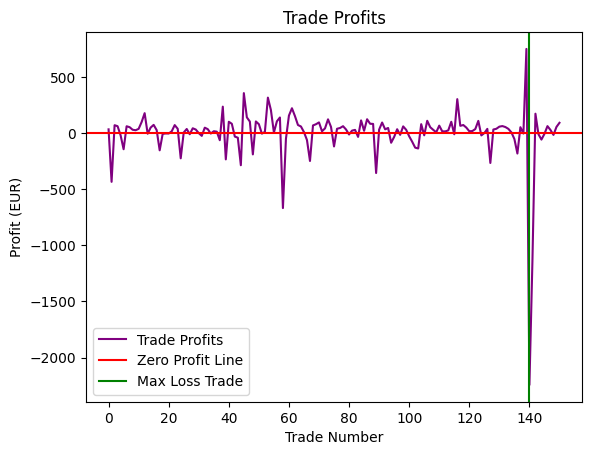

In [1218]:
plt.plot(trade_profits, label='Trade Profits', color = 'purple')
plt.axhline(y=0, color='r', linestyle='-', label='Zero Profit Line')
plt.axvline(x=max_loss_index, color='g', linestyle='-', label='Max Loss Trade')
plt.title('Trade Profits')
plt.xlabel('Trade Number')
plt.ylabel('Profit (EUR)')
plt.legend()

Average trade duration: 330.75 minutes


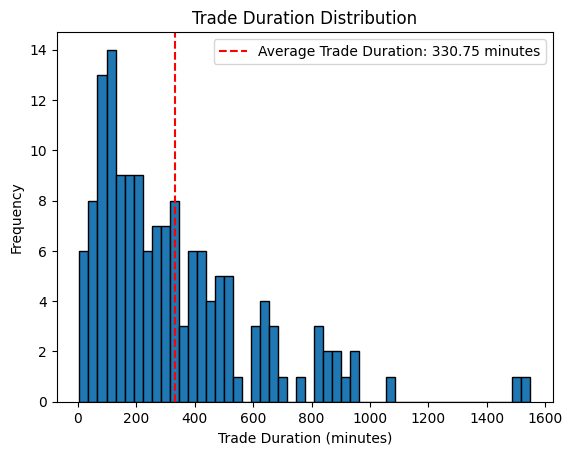

In [1219]:
#Calculate the durations of all the trades
#trade_durations = [exit - entry for entry, exit in zip(entry_times, exit_times)]
trade_durations = [(exit_time - entry_time).total_seconds() / 60 for entry_time, exit_time in zip(entry_times, exit_times)]

average_trade_duration = np.mean(trade_durations)
print(f"Average trade duration: {average_trade_duration:.2f} minutes")
#Plot distribution of trade durations
plt.hist(trade_durations, bins=50, edgecolor='black')
plt.axvline(x=average_trade_duration, color='red', linestyle='--', label=f'Average Trade Duration: {average_trade_duration:.2f} minutes')
plt.xlabel('Trade Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Trade Duration Distribution')
plt.legend()
plt.show()

In [1220]:
trade_durations[1]

113.0

Text(0.5, 1.0, 'Trade Profit vs Trade Duration')

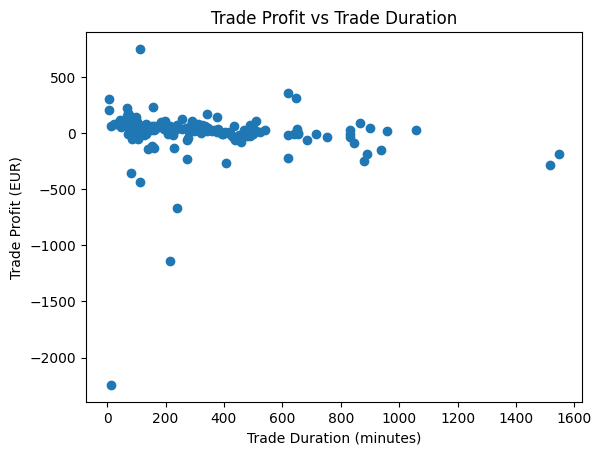

In [1221]:
#Plot trade profits vs trade durations
plt.scatter(trade_durations, trade_profits)
plt.xlabel('Trade Duration (minutes)')
plt.ylabel('Trade Profit (EUR)')
plt.title('Trade Profit vs Trade Duration')


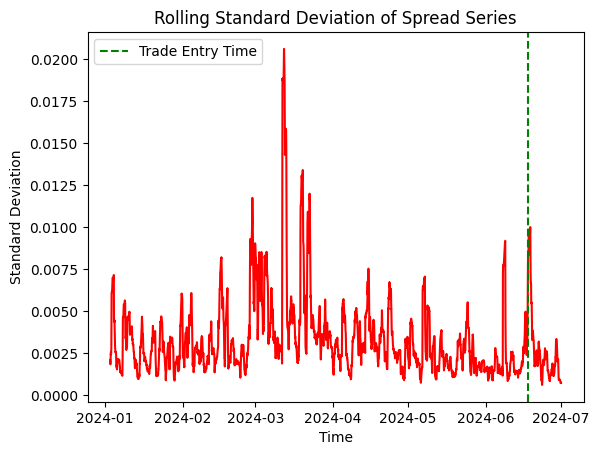

In [1222]:
plt.plot(rolling_std, color = 'red')
plt.axvline(trade_entry_min_profit, color='green', linestyle='--', label='Trade Entry Time')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title('Rolling Standard Deviation of Spread Series')
plt.legend()


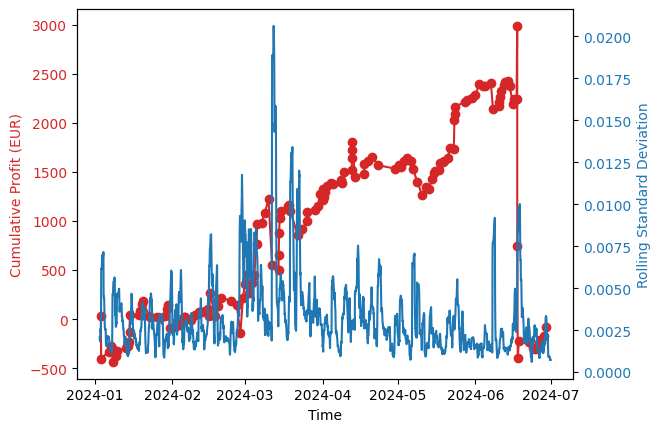

In [1223]:
#Plot cumulative profit series and rolling standard deviation on same plot

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')      
ax1.set_ylabel('Cumulative Profit (EUR)', color=color)
ax1.plot(cumulative_profit_series, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Rolling Standard Deviation', color=color)
ax2.plot(rolling_std, color=color)
ax2.tick_params(axis='y', labelcolor=color) 


Mean beta: 0.5567


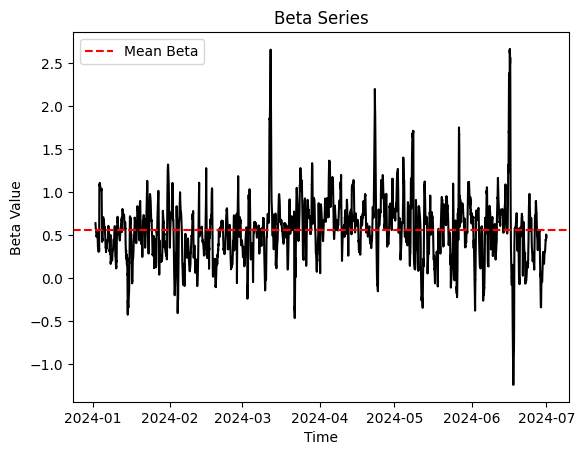

In [1224]:
#Calculate the mean of the beta series
mean_beta = np.mean(beta_series)
print(f"Mean beta: {mean_beta:.4f}")


#Plot beta series
plt.plot(beta_series, color = 'black')
plt.axhline(y=mean_beta, color='red', linestyle='--', label='Mean Beta')
plt.title('Beta Series')
plt.xlabel('Time')
plt.ylabel('Beta Value')
plt.legend()
plt.show()

In [1252]:
#Get actual Betas used for each trade entry
beta_entries = [beta_series[entry] for entry in entry_times]

trade_ranges = [(entry, exit) for entry, exit in zip(entry_times, exit_times)]

#Get beta series in the trade ranges

beta_series_trade_ranges = [beta_series[entry:exit] for entry, exit in trade_ranges]

#Calculate the difference between the beta at the trade entry and the betas in the trade range
delta_beta = [entry_beta - beta_range for entry_beta, beta_range in zip(beta_entries, beta_series_trade_ranges)]

#Take the ansolute value of the delta beta
absolute_delta_beta = [np.abs(delta) for delta in delta_beta]

#Calculate the mean delta beta for each trade
mean_absolute_delta_betas = [np.mean(delta) for delta in absolute_delta_beta]

#

# #Calculate the mean beta for each trade range
# mean_beta_trade_ranges = [np.mean(beta_range) for beta_range in beta_series_trade_ranges]

# #Calculate the delta neutrality of each trade by subtracting the mean beta of the trade range from the beta at the trade entry
# delta_neutrality = [entry_beta - trade_range_mean_beta for entry_beta, trade_range_mean_beta in zip(beta_entries, mean_beta_trade_ranges)]

# mean_delta_neutrality = np.mean(delta_neutrality)
# print(f"Mean Delta Neutrality: {mean_delta_neutrality:.4f}")

# #Plot delta neutrality of each trade
# plt.plot(delta_neutrality, color = 'blue')
# plt.axhline(mean_delta_neutrality, color='red', linestyle='--', label='Mean Delta')
# plt.title('Delta Neutrality of Each Trade')
# plt.xlabel('Trade Number')
# plt.ylabel('Delta Neutrality')
# plt.legend()
# plt.show()

#Calculate the delta neutrality of each trade

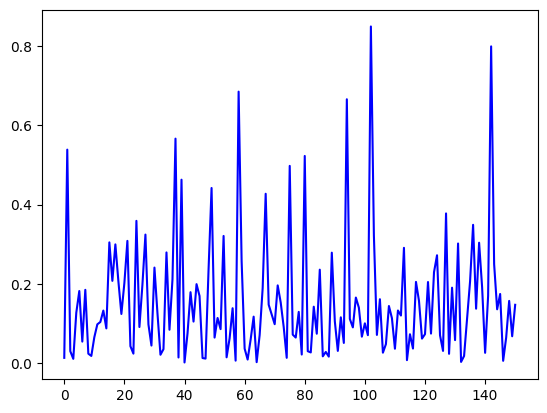

In [1254]:
plt.plot(mean_absolute_delta_betas, color = 'blue')

In [1255]:
# #Plot trade profits vs absolute delta neutrality

# from scipy import stats


# absolute_delta_neutrality = [abs(x) for x in delta_neutrality]

# #Perform a regression analysis to determine if there is a relationship between delta neutrality and trade profits
# slope, intercept, r_value, p_value, std_err = stats.linregress(absolute_delta_neutrality, trade_profits)

# print(f"Slope: {slope:.4f}")
# print(f"Intercept: {intercept:.4f}")
# print(f"R-squared: {r_value**2:.4f}")
# print(f"P-value: {p_value:.4f}")

# #Plot trade profits vs absolute delta neutrality and the regression line
# plt.plot(absolute_delta_neutrality, trade_profits, 'o', label='Trade Profits')
# plt.plot(absolute_delta_neutrality, intercept + slope*np.array(absolute_delta_neutrality), 'r', label='Regression Line')
# plt.xlabel('Absolute Delta Neutrality')
# plt.ylabel('Trade Profit (EUR)')
# plt.title('Trade Profit vs Absolute Delta Neutrality')
# plt.legend()
# plt.show()

# # plt.scatter(absolute_delta_neutrality, trade_profits, )
# # plt.xlabel('Delta Neutrality')
# # plt.ylabel('Trade Profit (EUR)')
# # plt.title('Trade Profit vs Delta Neutrality')


Slope: -318.1399
Intercept: 48.7947
R-squared: 0.0404
P-value: 0.0133


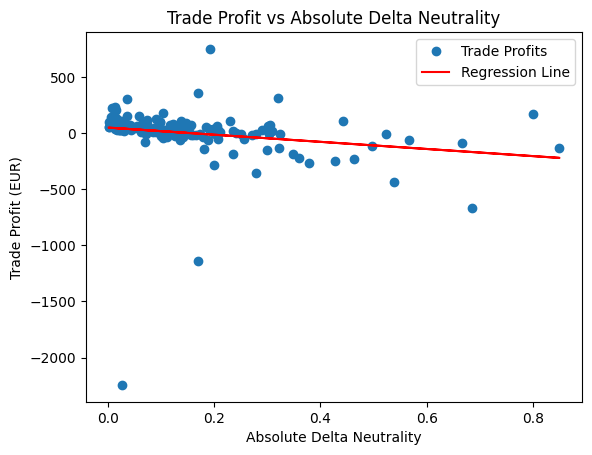

In [1256]:
#Plot trade profits vs absolute delta neutrality

from scipy import stats



#Perform a regression analysis to determine if there is a relationship between delta neutrality and trade profits
slope, intercept, r_value, p_value, std_err = stats.linregress(mean_absolute_delta_betas, trade_profits)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

#Plot trade profits vs absolute delta neutrality and the regression line
plt.plot(mean_absolute_delta_betas, trade_profits, 'o', label='Trade Profits')
plt.plot(mean_absolute_delta_betas, intercept + slope*np.array(mean_absolute_delta_betas), 'r', label='Regression Line')
plt.xlabel('Absolute Delta Neutrality')
plt.ylabel('Trade Profit (EUR)')
plt.title('Trade Profit vs Absolute Delta Neutrality')
plt.legend()
plt.show()

# plt.scatter(absolute_delta_neutrality, trade_profits, )
# plt.xlabel('Delta Neutrality')
# plt.ylabel('Trade Profit (EUR)')
# plt.title('Trade Profit vs Delta Neutrality')


In [1239]:
#Plot distributions of beta_series_trade_ranges in multiple subplots



In [1227]:
len(mean_beta_trade_ranges)

151

In [1228]:
len(beta_series_trade_ranges)

151

Text(0.5, 1.0, 'Rolling Standard Deviation of XRP/USDT_2024_1m')

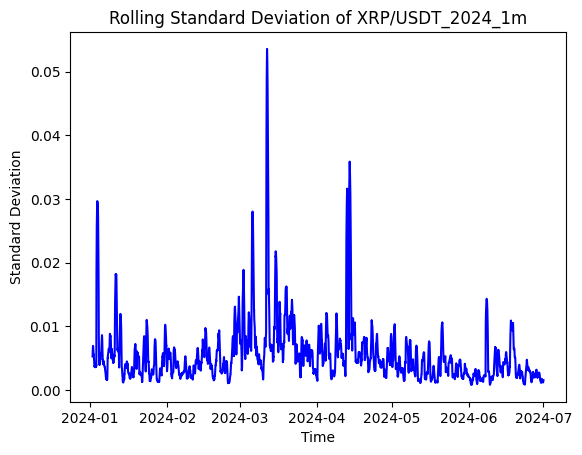

In [1229]:
#Calculate rolling standard deviation of S1 and S2
rolling_std_S1 = S1.rolling(window=window_size).std()
rolling_std_S2 = S2.rolling(window=window_size).std()

#Plot the rolling standard deviation of S1 and S2 on separate plots

plt.plot(rolling_std_S1, color='blue')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title(f'Rolling Standard Deviation of {sym1}')




Text(0.5, 1.0, 'Rolling Standard Deviation of ADA/USDT_2024_1m')

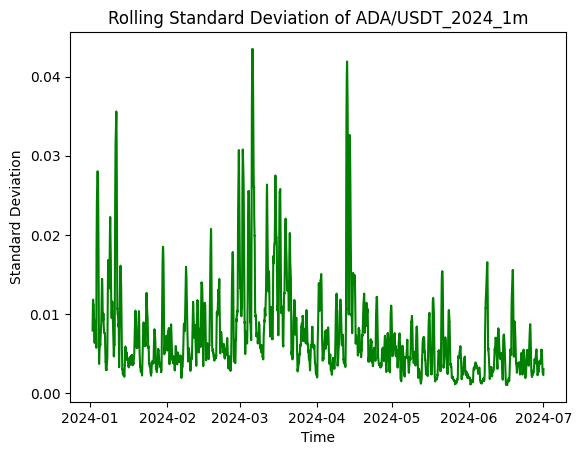

In [1230]:
plt.plot(rolling_std_S2, color='green')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title(f'Rolling Standard Deviation of {sym2}')

In [1231]:
#Get index of negative trade profits
negative_trade_profits_indeices = [i for i, x in enumerate(trade_profits) if x < 0]

#Get the corresponding trade entry and exit times
negative_trade_entry_times = [entry_times[i] for i in negative_trade_profits_indeices]
negative_trade_exit_times = [exit_times[i] for i in negative_trade_profits_indeices]


Trade 1 : 2024-06-17 16:19:00 to 2024-06-17 16:32:00 (win)


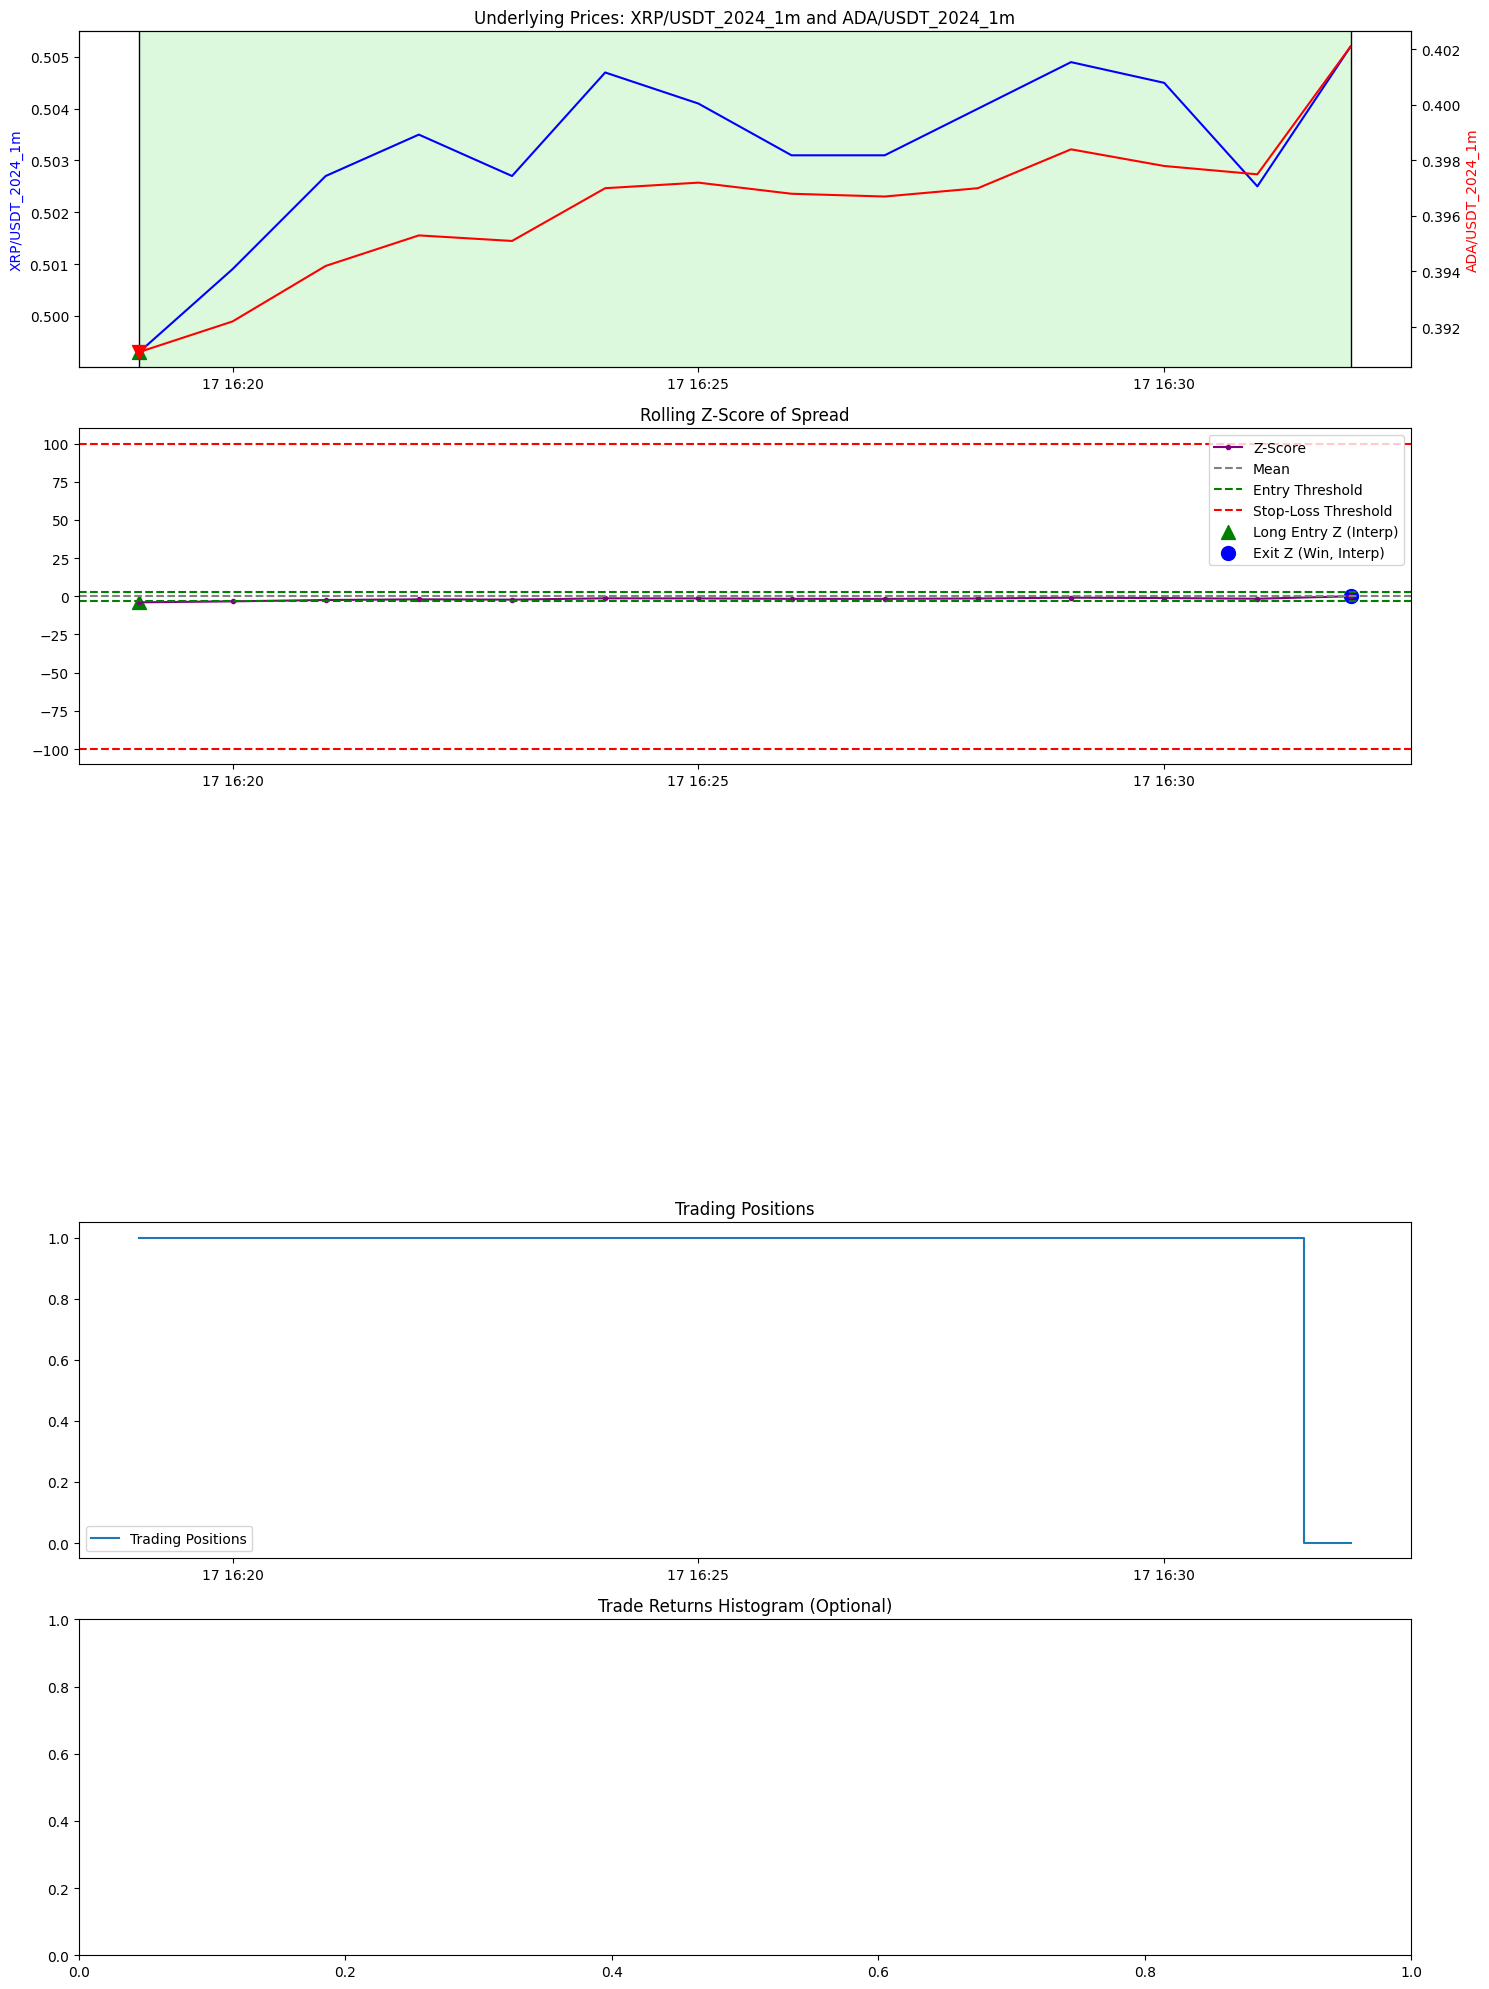

In [1232]:
#Plot trading simulation

# window_start = pd.to_datetime('2024-03-01 00:00:00')
# window_end = pd.to_datetime('2024-03-25 00:00:00')

#Window for biggest loss
window_start = pd.to_datetime(trade_entry_min_profit[0])
window_end = pd.to_datetime(trade_exit_min_profit)

# window_start = None
# window_end = None

#NOTE THAT THE TIMES ON THE X AXIS SHOW THE HOURS AND MINUTES

# S1 = S1_mid_price
# S2 = S2_mid_price

plot_trading_simulation(
    S1, 
    S2, 
    sym1, 
    sym2, 
    zscore_series, 
    positions, 
    entry_threshold,
    stop_loss_threshold,
    trade_entries=trade_entries,  # list of dicts: { 'time', 'S1', 'S2', 'z', 'position' }
    trade_exits=trade_exits,    # list of dicts: { 'time', 'S1', 'S2', 'z', 'exit_type' }
    window_start=window_start,
    window_end=window_end
)



In [1233]:
trade_exits

[{'time': Timestamp('2024-01-03 11:07:00'),
  'S1': np.float64(0.6308),
  'S2': np.float64(0.6126),
  'z': np.float64(-0.020968560610134922),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-03 13:48:00'),
  'S1': np.float64(0.5657),
  'S2': np.float64(0.553),
  'z': np.float64(0.05194679499616295),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-06 12:21:00'),
  'S1': np.float64(0.5676),
  'S2': np.float64(0.5212),
  'z': np.float64(0.02007886830859662),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-07 12:41:00'),
  'S1': np.float64(0.5669),
  'S2': np.float64(0.5201),
  'z': np.float64(0.01119449308913895),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-08 00:21:00'),
  'S1': np.float64(0.5525),
  'S2': np.float64(0.4911),
  'z': np.float64(0.15898622683630692),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-08 02:52:00'),
  'S1': np.float64(0.5597),
  'S2': np.float64(0.4728),
  'z': np.float64(-0.1271555907074046),
  'exit_type': 'win'},
 {'time': Timestamp('

In [1234]:
#Check slippage

#Get timestampe of trade entries and exits
entry_times = [x['time'] for x in trade_entries]
exit_times = [x['time'] for x in trade_exits]

#Get the actual entry and exit prices of the two assets at the time of trade entries and exits
S1_actual_entry_prices = [x['S1'] for x in trade_entries]
S2_actual_entry_prices = [x['S2'] for x in trade_entries]

S1_actual_exit_prices = [x['S1'] for x in trade_exits]
S2_actual_exit_prices = [x['S2'] for x in trade_exits]

#Get the mid prices of the two assets at the time of trade entries and exits
S1_entry_mid_prices = S1_mid_price.loc[entry_times]
S2_entry_mid_prices = S2_mid_price.loc[entry_times]

S1_exit_mid_prices = S1_mid_price.loc[exit_times]
S2_exit_mid_prices = S2_mid_price.loc[exit_times]

#Get the slippage for the two assets
S1_entry_slippage_percentage = (S1_actual_entry_prices - S1_entry_mid_prices) / S1_entry_mid_prices * 100
S2_entry_slippage_percentage = (S2_actual_entry_prices - S2_entry_mid_prices) / S2_entry_mid_prices * 100

S1_exit_slippage_percentage = (S1_actual_exit_prices - S1_exit_mid_prices) / S1_exit_mid_prices * 100
S2_exit_slippage_percentage = (S2_actual_exit_prices - S2_exit_mid_prices) / S2_exit_mid_prices * 100


NameError: name 'S1_mid_price' is not defined

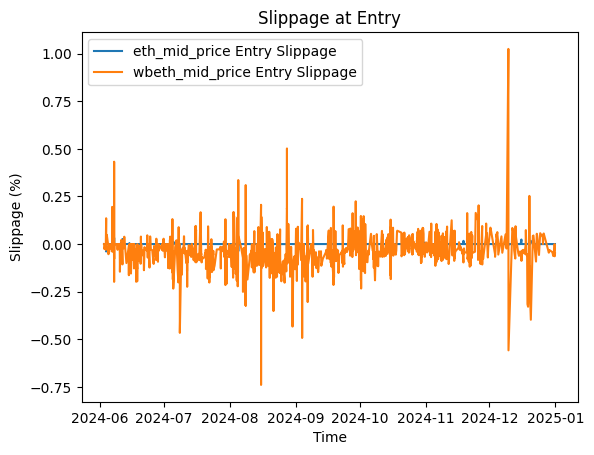

In [ ]:

#Create plots for slippage

plt.plot(S1_entry_slippage_percentage, label=f'{sym1} Entry Slippage')
plt.plot(S2_entry_slippage_percentage, label=f'{sym2} Entry Slippage')
plt.xlabel('Time')
plt.ylabel('Slippage (%)')
plt.title('Slippage at Entry')
plt.legend(loc='upper left')
plt.show()


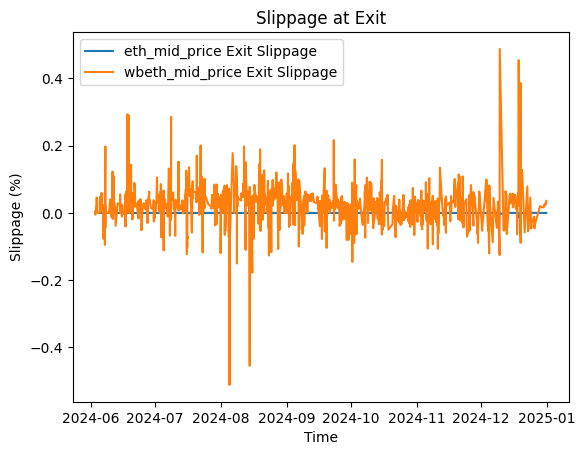

In [ ]:
plt.plot(S1_exit_slippage_percentage, label= f'{sym1} Exit Slippage')
plt.plot(S2_exit_slippage_percentage, label= f'{sym2} Exit Slippage')
plt.xlabel('Time')
plt.ylabel('Slippage (%)')
plt.title('Slippage at Exit')
plt.legend(loc='upper left')
plt.show()

In [42]:
#Print average S1 price change percent rounded to 2 decimal places

#Average Absolute Percentage Reversion
#---------------------------------------


In [43]:

def calculate_avg_abs_pct_reversion(trade_entries, trade_exits):
    """
    Calculate the average absolute percentage reversion from trade entry to trade exit
    for both asset price series (S1 and S2), using the interpolated trade data.
    
    Args:
        trade_entries (list): List of dictionaries for trade entries.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'position'
        trade_exits (list): List of dictionaries for trade exits.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'exit_type'
    
    Returns:
        overall_avg (float): The average of the average absolute percentage changes for S1 and S2.
    """
    S1_pct_changes = []
    S2_pct_changes = []
    
    # Loop over paired trade entries and exits.
    for entry, exit in zip(trade_entries, trade_exits):
        entry_S1 = entry['S1']
        entry_S2 = entry['S2']
        exit_S1 = exit['S1']
        exit_S2 = exit['S2']
        
        # Calculate absolute percentage change for each asset.
        pct_change_S1 = np.abs((exit_S1 - entry_S1) / entry_S1 * 100)
        pct_change_S2 = np.abs((exit_S2 - entry_S2) / entry_S2 * 100)
        
        S1_pct_changes.append(pct_change_S1)
        S2_pct_changes.append(pct_change_S2)
    
    # Compute the average absolute percentage change for S1 and S2.
    avg_abs_S1 = np.mean(S1_pct_changes) if S1_pct_changes else 0
    avg_abs_S2 = np.mean(S2_pct_changes) if S2_pct_changes else 0
    
    # Overall average is the average of the two.
    overall_avg = (avg_abs_S1 + avg_abs_S2) / 2
    
    print(f"Average absolute S1 price change percent: {avg_abs_S1:.2f}%")
    print(f"Average absolute S2 price change percent: {avg_abs_S2:.2f}%")
    print(f"Average of average absolute price changes: {overall_avg:.2f}%")
    
    return overall_avg



In [44]:
overall_avg_reversion = calculate_avg_abs_pct_reversion(trade_entries, trade_exits)

Average absolute S1 price change percent: 0.21%
Average absolute S2 price change percent: 0.22%
Average of average absolute price changes: 0.21%
